In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!cd models/research && \
    cp object_detection/packages/tf2/setup.py . && \
    python -m pip install .

In [ ]:
import os
import tensorflow as tf
import pathlib
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
gpus=tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
!tar -xzvf "/content/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz" -C "/content"


In [ ]:
!head {Path_to_Labels}

In [ ]:
category_index=label_map_util.create_category_index_from_labelmap(Path_to_Labels)

In [ ]:
category_index

In [ ]:
import tensorflow_hub as hub
url='https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1'

In [ ]:
model=hub.load(url)

In [ ]:
import numpy as np
def loading_images(path):
  return np.array(Image.open(path))

In [ ]:
def detect_objects(Image_Path):
  img=loading_images(Image_Path)
  tensor=tf.constant(img)
  results=model(tensor)
  num_detection=int(results.pop('num_detections'))
  results = {key: value[0, :num_detection].numpy()
                   for key, value in results.items()}
  results['detection_classes']=results['detection_classes'].astype(np.int64)
  image_with_detection=img.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detection,
      results['detection_boxes'],
      results['detection_classes'],
      results['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
          max_boxes_to_draw=300,
          min_score_thresh=.3,
          agnostic_mode=False
  )
  plt.figure(figsize=(15, 10))
  plt.imshow(image_with_detection)
  plt.show()


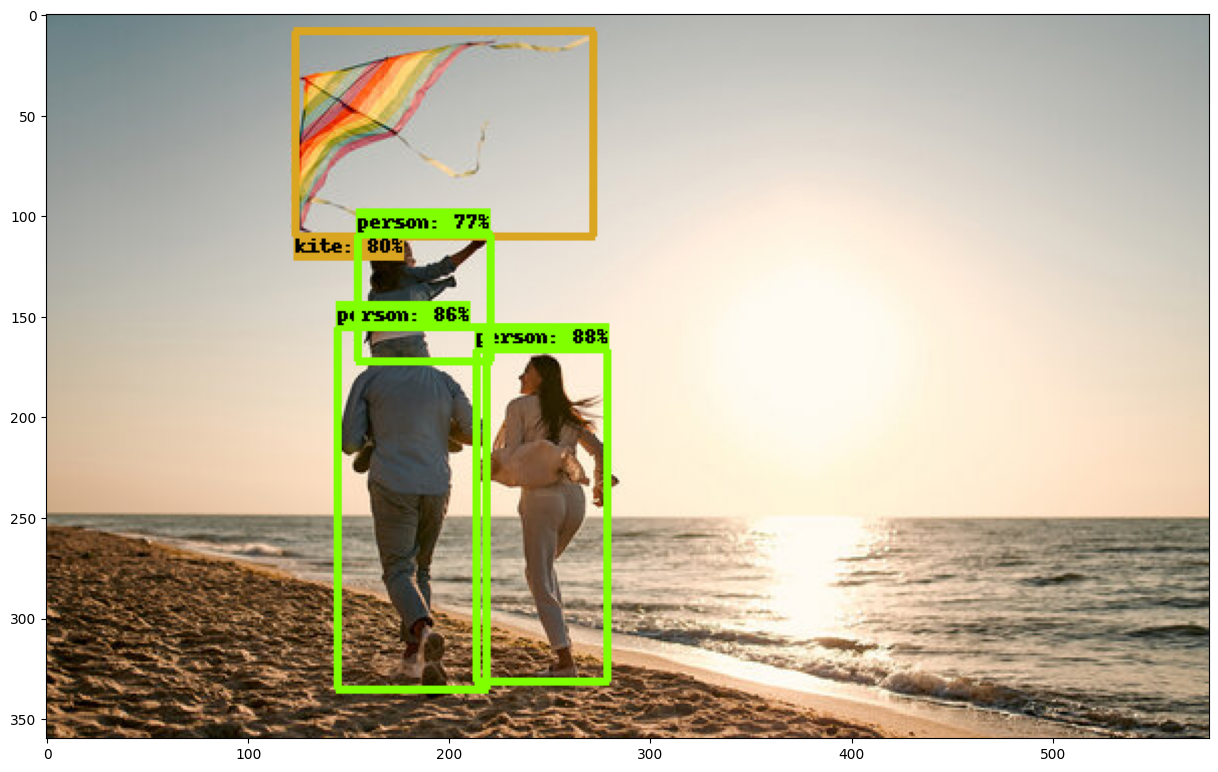

In [ ]:
detect_objects('People.jpg')